In [1]:
import os
from functools import partial

import numpy
import scipy
from matplotlib import pyplot

import os

import pyhf
import cabinetry

from pyhf_stuff import (
    fit_cabinetry,
    fit_cabinetry_post,
    fit_linspace,
    fit_normal,
    region,
    serial,
    blind,
)


In [2]:
BASE = "/home/tombs/Cambridge/interval-evidence/searches/ins1839446/"

SR2JBVEM_meffInc30_gluino
FitCabinetry(yield_pre=13.642857655289093, error_pre=2.3684927606375763)
FitCabinetryPost(yield_post=16.531955041947537, error_post=2.637764455278539)
FitNormal(yield_linear=13.638541497661837, error_linear=2.3835417380241624, error_log=0.17476514907644572)
FitLinspace(start=5, stop=40, levels=[107.99191246391484, 95.39836378696398, 91.57203701687571, 91.54524543579745, 92.79353693321025, 94.17647349288724, 95.34190551035087, 96.33236668599025, 97.19784205599505, 97.96968498969655, 98.66840358223092])


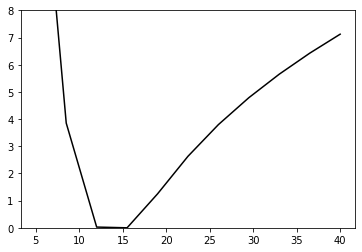

SR2JBVEM_meffInc30_squark
FitCabinetry(yield_pre=87.84031159115892, error_pre=12.568245144380565)
FitCabinetryPost(yield_post=99.84986323685062, error_post=8.236099516510823)
FitNormal(yield_linear=87.82274197613096, error_linear=12.661439706592427, error_log=0.1441703984832725)
FitLinspace(start=40, stop=160, levels=[103.3371480504844, 96.8445242842426, 92.99647391492019, 91.14710084849783, 90.64812692347634, 91.05316279933963, 92.0542262963269, 93.42237464577686, 94.98239549155414, 96.60981246883804, 98.227182363704])


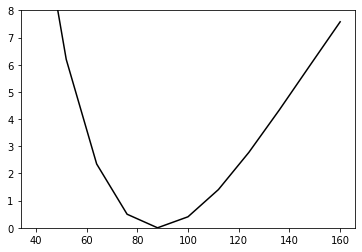

SR4JhighxBVEM_meffInc30
FitCabinetry(yield_pre=7.125501231631214, error_pre=2.2869669107941597)
FitCabinetryPost(yield_post=9.118002958317263, error_post=2.1788846195438882)
FitNormal(yield_linear=7.120915127642123, error_linear=2.2537658153185034, error_log=0.3164994631897501)
FitLinspace(start=0, stop=30, levels=[139.7543160127953, 100.89377917284807, 97.1980127504585, 97.28054487557544, 98.0443274420625, 98.994785043447, 99.97531186125396, 100.93357947656304, 101.85383181932417, 102.73257879149232, 103.5708717320705])


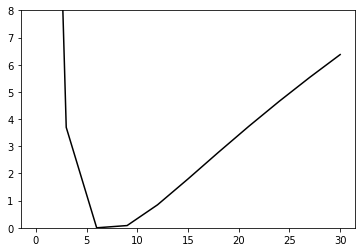

SR4JlowxBVEM_meffInc30
FitCabinetry(yield_pre=9.484252820620952, error_pre=1.6560111799346091)
FitCabinetryPost(yield_post=9.609455524796154, error_post=1.4693855946962946)
FitNormal(yield_linear=9.47449225359473, error_linear=1.7291235032375822, error_log=0.18250302569845187)
FitLinspace(start=0, stop=30, levels=[117.1748607558015, 107.94555561403355, 99.20200799064263, 96.10070711138756, 96.86242536910441, 98.96534553062267, 100.87995136792162, 102.21789188529613, 103.24092054716242, 104.08026056520039, 104.7971349488313])


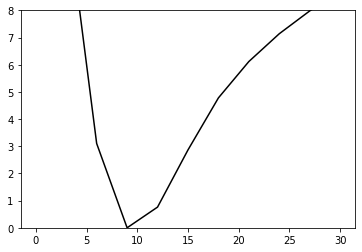

SR6JBVEM_meffInc30_gluino
FitCabinetry(yield_pre=1.8301131050702104, error_pre=0.6364159581379885)
FitCabinetryPost(yield_post=1.8622928723763599, error_post=0.5837892483793438)
FitNormal(yield_linear=1.828714324302002, error_linear=0.6404723527191329, error_log=0.3502309487096042)
FitLinspace(start=0, stop=12, levels=[109.5499724169925, 91.31144302822679, 90.9245175286145, 92.01693353571726, 93.1707180992319, 94.2208683008747, 95.16358748111321, 96.01815718084009, 96.7996708874494, 97.52024401185753, 98.18945236012392])


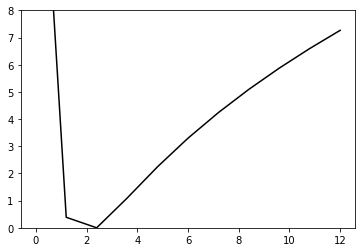

SR6JBVEM_meffInc30_squark
FitCabinetry(yield_pre=5.349349646351361, error_pre=0.8612056484517221)
FitCabinetryPost(yield_post=5.305725694209386, error_post=0.7999302661848582)
FitNormal(yield_linear=5.348387264787567, error_linear=0.8662236899863948, error_log=0.16195979219556392)
FitLinspace(start=0, stop=12, levels=[105.01606837258652, 102.76578245216919, 100.22027478047536, 92.7175005231845, 90.10291641401744, 90.12356235068046, 91.15635299030833, 92.35658643095213, 93.47578133975199, 97.69796746750191, 99.03117283825057])


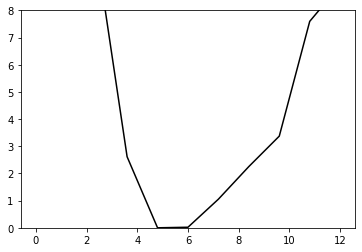

In [3]:
def main():
    region_name_to_scan = {
        "SR2JBVEM_meffInc30_gluino": (5, 40),
        "SR2JBVEM_meffInc30_squark": (40, 160),
        "SR4JhighxBVEM_meffInc30": (0, 30),
        "SR4JlowxBVEM_meffInc30": (0, 30),
        "SR6JBVEM_meffInc30_gluino": (0, 12),
        "SR6JBVEM_meffInc30_squark": (0, 12),
    }

    for name, (lo, hi) in region_name_to_scan.items():
        print(name)
        test(name, lo, hi)


def test(name, lo, hi, nbins=10):
    dir_region = os.path.join(BASE, name)
    region_1 = region.Region.load(dir_region)

    dir_fit = os.path.join(dir_region, "fit")

    # cabinetry
    cab = fit_cabinetry.fit(region_1)
    print(cab)
    cab_post = fit_cabinetry_post.fit(region_1)
    print(cab_post)
    
    # normal
    norm = fit_normal.fit(region_1)
    print(norm)
    
    # linspace
    linspace = fit_linspace.fit(region_1, lo, hi, nbins + 1)
    print(linspace)
    
    levels = numpy.array(linspace.levels)
    levels -= levels.min()
    
    x = numpy.linspace(linspace.start, linspace.stop, len(levels))
    pyplot.plot(x, levels, "k")
    pyplot.ylim(0, 8)
    pyplot.show()

    
main()

# try fitting the bkgonly without bin selection (fails)

In [4]:
def test_native():
    spec = serial.load_json_gz(os.path.join(BASE, "bkg.json.gz"))
    workspace = pyhf.workspace.Workspace(region.clear_poi(spec))
    
    channels = workspace.channel_slices.keys()

    # find control and signal region strings
    control_regions_2j = set()
    control_regions_4j = set()
    control_regions_6j = set()
    signal_regions = set()
    for name in channels:
        if name.startswith("WR") or name.startswith("TR"):
            if name[2:4] == "2J":
                control_regions_2j.add(name)
            elif name[2:4] == "4J":
                control_regions_4j.add(name)
            elif name[2:4] == "6J":
                control_regions_6j.add(name)
            else:
                raise ValueError(name)
            continue
        assert name.startswith("SR"), name
        signal_regions.add(name)

    sr_name = "SR2JBVEM_meffInc30"

    workspace = region.prune(workspace, sr_name, *control_regions_2j)
    
    model = workspace.model()
    data = workspace.data(model)
    model_blind = blind.Model(model, {sr_name})
    
    # manual cabinetry fit
    prediction = cabinetry.model_utils.prediction(
        model_blind, fit_results=cabinetry.fit.fit(model_blind, data)
    )
    
    print(prediction)
    
    index = model_blind.config.channels.index(sr_name)
    print(numpy.sum(prediction.model_yields[index], axis=0))
    print(prediction.total_stdev_model_bins[index])

    
test_native()

ModelPrediction(model=<pyhf_stuff.blind.Model object at 0x7f404c59ef50>, model_yields=[[[66.36329341642721, 26.13439813692079, 5.445977239492404], [3.5353450118802248, 0.0, 0.0], [0.0, 3.4583429173729097, 0.0], [0.0, 0.0, 1.011354973194401], [23.419902108783205, 0.0, 0.0], [0.0, 12.426439444361147, 0.0], [0.0, 0.0, 1.1987962535991505], [1.326478591351193, 0.5761857700256634, 0.03928746553434101], [151.51542105907515, 0.0, 0.0], [0.0, 27.1991282839425, 0.0], [0.0, 0.0, 4.59428139946571], [14.422161902439488, 4.402959386391564, 1.3531603253647657]], [[21.4988540143434, 10.7191609173503, 1.9843653857069514], [69.96891006153822, 0.0, 0.0], [0.0, 37.93226132157133, 0.0], [0.0, 0.0, 3.3775765333530816], [468.30532273628114, 0.0, 0.0], [0.0, 242.92425859757626, 0.0], [0.0, 0.0, 15.493375522802275], [5.978592225586625, 4.78893997445456, 0.7653754129791691], [385.22140707503866, 0.0, 0.0], [0.0, 95.51920223325999, 0.0], [0.0, 0.0, 11.17064151181067], [4.01427727354679, 1.163461911612402, 0.2135